<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#3d0a6e;
            font-size:140%;
            font-family:Verdana;
            letter-spacing:1px;
            padding: 20px;
            text-align:center;
            font-weight: bold;">
   Credit Score Classification
</div>


### **Importing Sufficient Libraries**

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set_style("whitegrid")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

### **Importing Data**

In [2]:
df = pd.read_csv(r"C:\Users\user\Desktop\CreditScore.csv")

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,265,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,266,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629163,Good
2,5636,3392,3,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,267,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,268,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,269,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


### **Exploratory Data Analysis (EDA)**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  int64  
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

In [5]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633330,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [6]:
print(f'Data Shape: {df.shape}')
print(f'Number of duplicate values: {df.duplicated().sum()}')
print(f'Number of missing values:\n{df.isnull().sum()}')

Data Shape: (100000, 28)
Number of duplicate values: 0
Number of missing values:
ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [7]:
df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          2860
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio     99998
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98492
Credit_Score                     3
dtype: int64

### **Data Cleaning and Transformation**

In [8]:
encoder = LabelEncoder()
df[['Credit_Mix', 'Payment_of_Min_Amount', 
    'Type_of_Loan', 'Credit_Score']] = df[['Credit_Mix', 
    'Payment_of_Min_Amount', 'Type_of_Loan', 'Credit_Score']].apply(lambda col: encoder.fit_transform(col))

In [9]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,1,809.98,26.822620,265,1,49.574949,21.46538,High_spent_Small_value_payments,312.494089,0
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,1,809.98,31.944960,266,1,49.574949,21.46538,Low_spent_Large_value_payments,284.629163,0
2,5636,3392,3,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,1,809.98,28.609352,267,1,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,0
3,5637,3392,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,1,809.98,31.377862,268,1,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,0
4,5638,3392,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,1,809.98,24.797347,269,1,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,0


Text(0, 0.5, 'Count')

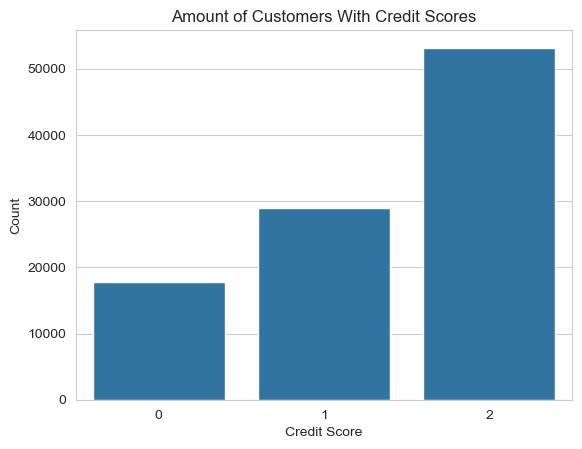

In [10]:
sns.countplot(x='Credit_Score', data=df)
plt.title('Amount of Customers With Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Count')

In [11]:
X = df.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation',
             'Type_of_Loan', 'Payment_Behaviour', 'Credit_Score'], axis=1)

y = df['Credit_Score']

In [12]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [13]:
X = X_scaled
y = y = df['Credit_Score']

Text(0.5, 1.0, 'Correlation Heatmap')

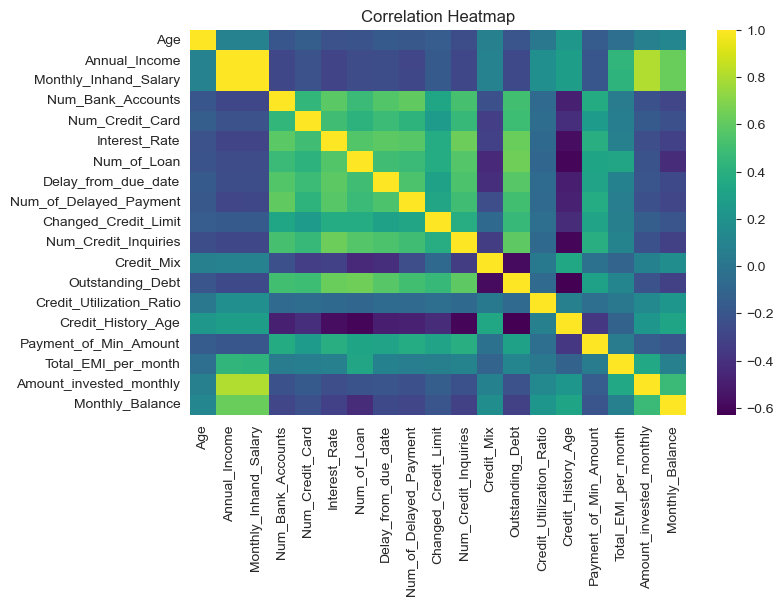

In [14]:
plt.figure(figsize=(8, 5))

sns.heatmap(df.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation',
             'Type_of_Loan', 'Payment_Behaviour', 'Credit_Score'], axis=1).corr(), annot=False, cmap='viridis')
plt.title('Correlation Heatmap')

### **Model Benchmarking and Evaluation**

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

#### Logistic Regression

In [16]:
model = LogisticRegression()

model.fit(X_train,y_train)

pred = model.predict(X_test)

print("Confustion Matrix:\n", confusion_matrix(y_test, pred))
print("Classification Report:\n", classification_report(y_test, pred))

Confustion Matrix:
 [[ 2982    70  2255]
 [  461  4491  3647]
 [ 1827  2263 12004]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.56      0.56      5307
           1       0.66      0.52      0.58      8599
           2       0.67      0.75      0.71     16094

    accuracy                           0.65     30000
   macro avg       0.63      0.61      0.62     30000
weighted avg       0.65      0.65      0.65     30000



#### Decision Tree 

In [17]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Confustion Matrix:\n", confusion_matrix(y_test, pred))
print("Classification Report:\n", classification_report(y_test, pred))

Confustion Matrix:
 [[ 3615   150  1542]
 [  124  6229  2246]
 [ 1636  2140 12318]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.68      0.68      5307
           1       0.73      0.72      0.73      8599
           2       0.76      0.77      0.77     16094

    accuracy                           0.74     30000
   macro avg       0.72      0.72      0.72     30000
weighted avg       0.74      0.74      0.74     30000



#### Random Forest

In [18]:
model = KNeighborsClassifier()

model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Confustion Matrix:\n", confusion_matrix(y_test, pred))
print("Classification Report:\n", classification_report(y_test, pred))

Confustion Matrix:
 [[ 3730   154  1423]
 [  391  6416  1792]
 [ 1697  2162 12235]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.70      0.67      5307
           1       0.73      0.75      0.74      8599
           2       0.79      0.76      0.78     16094

    accuracy                           0.75     30000
   macro avg       0.72      0.74      0.73     30000
weighted avg       0.75      0.75      0.75     30000



#### Support Vector Machine

In [19]:
model = SVC()

model.fit(X_train,y_train)

pred = model.predict(X_test)

print("Confustion Matrix:\n", confusion_matrix(y_test, pred))
print("Classification Report:\n", classification_report(y_test, pred))

Confustion Matrix:
 [[ 3928    46  1333]
 [  788  5431  2380]
 [ 2336  1737 12021]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.74      0.64      5307
           1       0.75      0.63      0.69      8599
           2       0.76      0.75      0.76     16094

    accuracy                           0.71     30000
   macro avg       0.69      0.71      0.69     30000
weighted avg       0.72      0.71      0.71     30000



#### XGBoost 

In [20]:
model = xgb.XGBClassifier()

model.fit(X_train,y_train)

pred = model.predict(X_test)

print("Confustion Matrix:\n", confusion_matrix(y_test, pred))
print("Classification Report:\n", classification_report(y_test, pred))

Confustion Matrix:
 [[ 3974    59  1274]
 [  241  6634  1724]
 [ 1424  1955 12715]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.75      0.73      5307
           1       0.77      0.77      0.77      8599
           2       0.81      0.79      0.80     16094

    accuracy                           0.78     30000
   macro avg       0.76      0.77      0.76     30000
weighted avg       0.78      0.78      0.78     30000



### **Hyperparameters Tuning for XGBoost**

In [26]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.001, 0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

pred = grid_search.best_estimator_.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

print("Classification Report:\n", classification_report(y_test, pred))

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 400}
Best Score: 0.7852571601161848
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.76      5307
           1       0.79      0.82      0.80      8599
           2       0.83      0.80      0.81     16094

    accuracy                           0.80     30000
   macro avg       0.79      0.79      0.79     30000
weighted avg       0.80      0.80      0.80     30000



### And there we have it! Credit Score classification model with pretty decent results.